In [1]:
from twopoint_harmonic import *

Using CAMB 1.1.3 installed at /global/homes/n/nishant/.conda/envs/cobaya/lib/python3.8/site-packages/camb


In [2]:
Fiducial = Universe()
Fiducial.runCAMB()
DESY1 = Kernels(Fiducial)
filename = 'map_prediction_chain_2x2pt_fixedcosmo_free_mag_pm_samp_buzzard_mean_dv_16_sompz_bin_zs_true_true_zl_no_sn_no_jk_20xrand_bNGcov.fits_scales_3x2pt_0.5_8_6_v0.4.ini_lcdm_scaledrsd.txt'
DESY1.loadDES_nzs(filename)

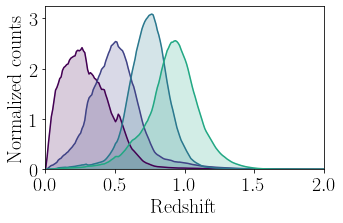

<Figure size 432x288 with 0 Axes>

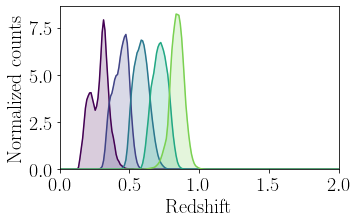

<Figure size 432x288 with 0 Axes>

In [3]:
DESY1.plot_source_nzs()
DESY1.plot_lens_nzs()

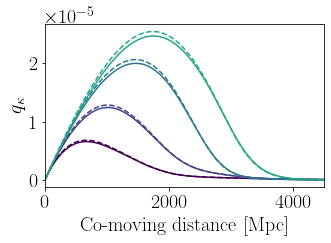

<Figure size 432x288 with 0 Axes>

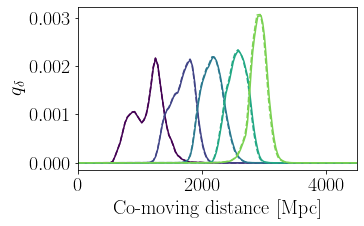

<Figure size 432x288 with 0 Axes>

In [4]:
DESY1.source_kernel()
DESY1.lens_kernel()

DESY1.plot_source_kernels()
DESY1.plot_lens_kernels()

In [5]:
#b1, b2, bs2, bnabla2, SN
Fiducial.set_biasParams_Anzu(0.7, 0, 0, 0 ,0)

wave_density = 1000
k_range = np.logspace(-5,-0.177, wave_density)

z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)

In [6]:
print(Pmm.shape)

(1000, 401)


In [8]:
TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)
start = time.time()

C_kk = TwoPointHarmonicDESY1.genC_kk()
C_dk = TwoPointHarmonicDESY1.genC_dk()
C_dd = TwoPointHarmonicDESY1.genC_dd()

end = time.time()

print(end-start)
print(C_kk.shape)
print(C_dk.shape)
print(C_dd.shape)

7.11632513999939
(4, 4, 3000)
(5, 4, 3000)
(5, 5, 3000)


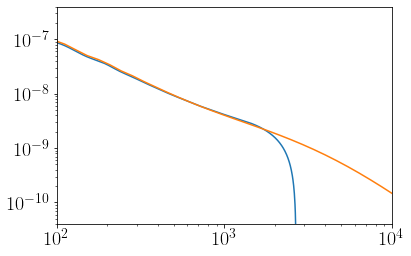

In [9]:
ell_test = np.loadtxt('ell.txt')
bin_3_3_test = np.loadtxt('bin_3_3.txt')
R = .0000

plt.plot(TwoPointHarmonicDESY1.ells, C_dk[2,2,:] * np.exp(-TwoPointHarmonicDESY1.ells**2 * R**2))
plt.plot(ell_test, bin_3_3_test)
plt.ylim(4e-11, 4e-7)
plt.xlim(100,1e4)
plt.xscale('log')
plt.yscale('log')

In [ ]:
#b1, b2, bs2, bnabla2, SN
C_dk_list = []
C_kk_list = []

for num in np.linspace(0.2, 1.5, 3):
    start = time.time()

    Fiducial.set_biasParams_Anzu(num, 0, 0, 0 ,0)

    wave_density = 1000
    k_range = np.logspace(-5,-0.177, wave_density)

    z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)


    TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)

    C_dk_list.append(TwoPointHarmonicDESY1.genC_dk())
    C_kk_list.append(TwoPointHarmonicDESY1.genC_kk())
    #C_dd = TwoPointHarmonicDESY1.genC_dd()

    end = time.time()

    print(end-start, ' seconds')

In [ ]:
import matplotlib.cm as cm

In [ ]:
colormap = cm.get_cmap('Reds', 3)

for num in range(3):
    C_dk_temp = C_dk_list[num]
    plt.plot(TwoPointHarmonicDESY1.ells, C_dk_temp[2,2,:], color=colormap(num), label='$b_1 = $' + str(np.round(np.linspace(0.2, 2, 3)[num], decimals=2)))
    
plt.xlabel('$\ell$')
plt.ylabel(r'$C^{33}_{\delta \kappa}$')

plt.ylim(4e-11, 4e-6)
plt.xlim(1,1e3)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('C_dk_b1_bias.pdf', bbox_inches='tight')
plt.show()

In [ ]:
colormap = cm.get_cmap('Reds', 3)

for num in range(3):
    C_kk_temp = C_kk_list[num]
    plt.plot(TwoPointHarmonicDESY1.ells, C_kk_temp[2,2,:], color=colormap(num), label='$b_1 = $' + str(np.round(np.linspace(0.2, 2, 3)[num], decimals=2)))
    
plt.xlabel('$\ell$')
plt.ylabel(r'$C^{33}_{\kappa \kappa}$')

plt.ylim(4e-11, 4e-6)
plt.xlim(1,1e3)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('C_kk_b1_bias.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#b1, b2, bs2, bnabla2, SN
C_dk_list = []
for num in np.linspace(-2, 2, 5):
    start = time.time()

    Fiducial.set_biasParams_Anzu(0.7, num, 0, 0 ,0)

    wave_density = 1000
    k_range = np.logspace(-5,-0.177, wave_density)

    z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)


    TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)

    C_dk_list.append(TwoPointHarmonicDESY1.genC_dk())
    #C_dk = TwoPointHarmonicDESY1.genC_dk()
    #C_dd = TwoPointHarmonicDESY1.genC_dd()

    end = time.time()

    print(end-start, ' seconds')

In [ ]:
colormap = cm.get_cmap('Reds', 5)

for num in range(5):
    C_dk_temp = C_dk_list[num]
    plt.plot(TwoPointHarmonicDESY1.ells, C_dk_temp[2,2,:], color=colormap(num), label='$b_2 = $' + str(np.round(np.linspace(-2, 2, 5)[num], decimals=2)))
    
plt.xlabel('$\ell$')
plt.ylabel(r'$C^{33}_{\delta \kappa}$')

plt.ylim(4e-11, 4e-6)
plt.xlim(1,1e3)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.savefig('C_dk_b2_bias.pdf', bbox_inches='tight')
plt.show()

In [ ]:
#b1, b2, bs2, bnabla2, SN
C_dk_list = []
for num in np.linspace(-4, 4, 5):
    start = time.time()

    Fiducial.set_biasParams_Anzu(0.7, 0, num, 0 ,0)

    wave_density = 1000
    k_range = np.logspace(-5,-0.177, wave_density)

    z, (Pmm, Pgg, Pmg) = Fiducial.genPowerSpectrum(k_range)


    TwoPointHarmonicDESY1 = TwoPointHarmonic(DESY1, lmax=10000)

    C_dk_list.append(TwoPointHarmonicDESY1.genC_dk())
    #C_dk = TwoPointHarmonicDESY1.genC_dk()
    #C_dd = TwoPointHarmonicDESY1.genC_dd()

    end = time.time()

    print(end-start, ' seconds')

In [ ]:
colormap = cm.get_cmap('Reds', 5)

for num in range(5):
    C_dk_temp = C_dk_list[num]
    plt.plot(TwoPointHarmonicDESY1.ells, C_dk_temp[2,2,:], color=colormap(num), label=r'$b_{\nabla^2} = $' + str(np.round(np.linspace(-4, 4, 5)[num], decimals=2)))
    
plt.xlabel('$\ell$')
plt.ylabel(r'$C^{33}_{\delta \kappa}$')

plt.ylim(4e-11, 4e-6)
plt.xlim(1,1e3)
plt.xscale('log')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()